In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import sklearn  
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn import linear_model, datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from tqdm import tqdm

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})


Bad key "text.kerning_factor" on line 4 in
/Users/harrisonsarsito/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [15]:
df = pd.read_csv("augmented_data.csv")

In [16]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_liquid parafin,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,Diameter_nm,Absorbance max (nm),PL max (nm)
0,0,0,1.105103,-0.437486,-0.243779,-0.525437,-0.416112,-0.165455,-0.123360,-0.302087,...,0,1,0,0,1,0,0,3.41,566.0,575.0
1,1,1,-0.062540,-0.472027,-0.436361,-0.305510,-0.498129,-0.375671,-0.241193,-0.302087,...,0,1,0,0,1,0,0,2.50,474.0,617.0
2,2,2,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.451959,-0.527427,-0.302087,...,0,1,0,0,1,0,0,1.99,450.4,497.0
3,3,3,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.13,471.6,510.0
4,4,4,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.27,486.0,517.0


In [17]:
#Separate X and y data
X = df.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_size = df['Diameter_nm'].values #will predict diameter
y_abs = df['Absorbance max (nm)'].values #will predict absorbance
y_PL = df['PL max (nm)'].values #will predict PL

# Size prediction

In [18]:
#split dataset into train and test set
X_train, X_test, y_size_train, y_size_test = train_test_split(X, y_size, test_size=0.25, random_state=8, shuffle=True)

In [19]:
for neighbors in np.arange (1, 100, 1):
    knn = KNeighborsRegressor(n_neighbors=neighbors)
    knn.fit(X_train,y_size_train)
    y_size_predict = knn.predict(X_test)
    MSE = mean_squared_error(y_size_test, y_size_predict)
    R2 = r2_score(y_size_test, y_size_predict)
    print("MSE", MSE, "R2", R2)    


MSE 0.6989643801694915 R2 0.6139151743393838
MSE 0.9528905905932205 R2 0.4736547269352782
MSE 1.1579594271939737 R2 0.3603814782924384
MSE 1.3778075232838984 R2 0.23894465510251495
MSE 1.231725672786441 R2 0.3196354419031452
MSE 1.188071373408663 R2 0.34374863428144464
MSE 1.2236464862365968 R2 0.3240981175688491
MSE 1.2753286200794494 R2 0.29555061471949373
MSE 1.340805511615401 R2 0.2593833435814039
MSE 1.3655658232101695 R2 0.24570656568458082
MSE 1.3458567224373164 R2 0.25659322164546006
MSE 1.3559976975082397 R2 0.25099168213448153
MSE 1.3386804038010234 R2 0.26055718291185026
MSE 1.3132710377135939 R2 0.274592477061794
MSE 1.2840589213227873 R2 0.2907282848138104
MSE 1.2708074416426112 R2 0.29804796428134694
MSE 1.294354680315524 R2 0.28504124777940454
MSE 1.3537696582088306 R2 0.2522223774157901
MSE 1.3717154070181696 R2 0.2423097388079074
MSE 1.3972106838470337 R2 0.22822699040339745
MSE 1.4128728851001189 R2 0.21957570800358128
MSE 1.4266728037550775 R2 0.21195308897006415
MSE

In [20]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_size_train)
y_size_predict = knn.predict(X_test)
MSE = mean_squared_error(y_size_test, y_size_predict)
R2 = r2_score(y_size_test, y_size_predict)

print("MSE", MSE, "R2", R2)

MSE 0.6989643801694915 R2 0.6139151743393838


In [70]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

In [71]:
kf.split(X)

<generator object _BaseKFold.split at 0x7f3b63b87270>

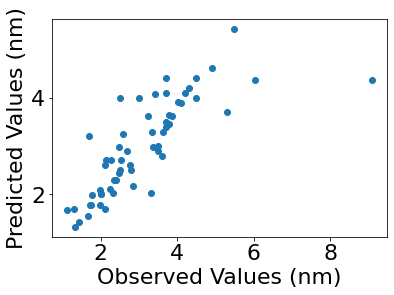

In [77]:
plt.figure()
plt.title("")
plt.plot(y_size_test, y_size_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# Abs prediction

In [17]:
#split dataset into train and test set
X_train, X_test, y_abs_train, y_abs_test = train_test_split(X, y_abs, test_size=0.25, random_state=8, shuffle=True)

In [ ]:
for neighbors in np.arange (1, 100, 1):
    knn = KNeighborsRegressor(n_neighbors=neighbors)
    knn.fit(X_train,y_abs_train)
    y_abs_predict = knn.predict(X_test)
    MSE = mean_squared_error(y_abs_test, y_abs_predict)
    R2 = r2_score(y_abs_test, y_abs_predict)
    print("MSE", MSE, "R2", R2)    


In [45]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_abs_train)
y_abs_predict = knn.predict(X_test)
MSE = mean_squared_error(y_abs_test, y_abs_predict)
R2 = r2_score(y_abs_test, y_abs_predict)

print("MSE", MSE, "R2", R2)

MSE 1261.5064406779659 R2 0.7534550122256516


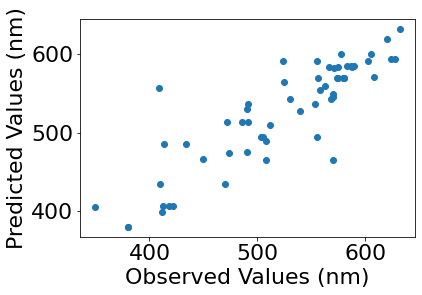

In [46]:
plt.figure()
plt.title("")
plt.plot(y_abs_test, y_abs_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# PL prediction

In [19]:
#split dataset into train and test set
X_train, X_test, y_PL_train, y_PL_test = train_test_split(X, y_PL, test_size=0.25, random_state=8, shuffle=True)

In [ ]:
for neighbors in np.arange (1, 100, 1):
    knn = KNeighborsRegressor(n_neighbors=neighbors)
    knn.fit(X_train,y_PL_train)
    y_PL_predict = knn.predict(X_test)
    MSE = mean_squared_error(y_PL_test, y_PL_predict)
    R2 = r2_score(y_PL_test, y_PL_predict)
    print("MSE", MSE, "R2", R2)    


In [59]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_PL_train)
y_PL_predict = knn.predict(X_test)
MSE = mean_squared_error(y_PL_test, y_PL_predict)
R2 = r2_score(y_PL_test, y_PL_predict)

print("MSE", MSE, "R2", R2)

MSE 1091.4261501651333 R2 0.37630465115105294


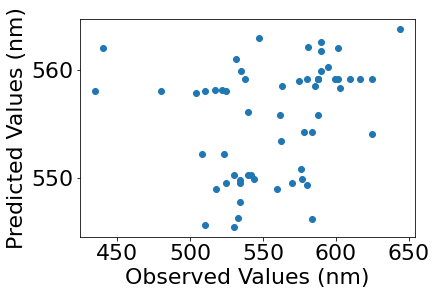

In [61]:
plt.figure()
plt.title("")
plt.plot(y_PL_test, y_PL_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()